<a href="https://colab.research.google.com/github/tushar2411/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING-NETFLIX-MOVIES-/blob/main/Netflix_Movie_and_TV_Shows_Clustering_Tushar_k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movie and TV Shows Clustering

**Project Type** - Unsupervised Machine Learning

**Contribution** - Team

**Team Member 1** - Shreyash Sarode

**Team Member 2** - Pradnya Pagar

**Team Member 3** - Tushar Khairnar

**Team Member 4** - Taha Nakedar

# **Project Summary -**

*Netflix, the world’s largest on-demand internet streaming media and online DVD movie rental service provider.it Founded August 29, 1997, in Los Gatos, California by Marc and Reed. It has 69 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day Netflix is the world’s leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive, and exciting visualizations and find similar groups of people.*

*This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Fixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset. Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.*


*In this project, we worked on a text clustering problem where we had to classify/group the Netflix movie/shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.*

- *The dataset contained about 7787 records, and 11 attributes.* 

- *In the initial phase, we have focused more on the data cleaning and analyzed data in various categories and then we did exploratory data analysis (EDA).*

- *We Created cluster using following attributes like director, cast, country, genre, rating and description. These attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.*

- *We used Principal Component Analysis (PCA) to handle the curse of dimensionality.*

- *We built Two types of clusters using the K-Means Clustering and Agglomerative Heirachycal clustering algorithm and find out optimal number of clusters using diffrent technique such as elbow method, silhoutte score and dendogram etc.*

- *A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.*

# **GitHub Link** -

# **Problem Statement**


<b>This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [6]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime as dt

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata

import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


### Dataset Loading

In [7]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:

# Load Dataset
file_path= ('/content/drive/MyDrive/Capstone Project - 4 : NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
netflix_df = pd.read_csv(file_path)

In [9]:
model_df=pd.read_csv(file_path)
netflix_df=model_df.copy()

### Dataset First View

In [10]:
# Dataset First Look
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [11]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [12]:
# Dataset Rows & Columns count
print(f'number of rows : {netflix_df.shape[0]}  \nnumber of columns : {netflix_df.shape[1]}')

number of rows : 7787  
number of columns : 12


### Dataset Information

In [13]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
print(f'Number of duplicate values in the dataset : {netflix_df.duplicated().sum()}')

Number of duplicate values in the dataset : 0


#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [16]:
# Missing Values Percentage
round(netflix_df.isna().sum()/netflix_df.shape[0]*100, 2).sort_values(ascending=False).head(5)

director      30.68
cast           9.22
country        6.51
date_added     0.13
rating         0.09
dtype: float64

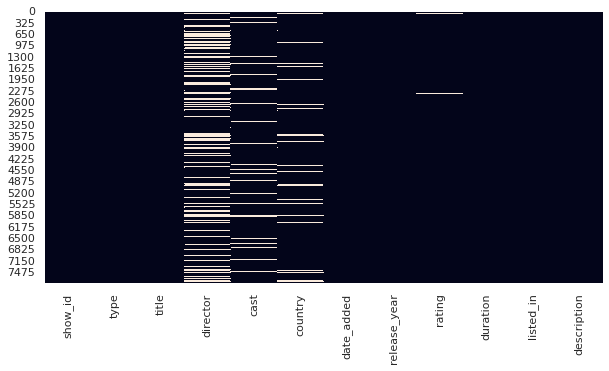

In [17]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(netflix_df.isnull(), cbar=False)

### What did you know about your dataset?

NaN values present in the director, cast, country, date_added and rating column. 

All the data that we have is related to each specific movie. So, we can't impute any null values with using any method. Also we don't want to loose any data since the data size is small for that reason we simply impute nan values with empty space in below procedure analyzing each columns.

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [19]:
# Dataset Describe
netflix_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ***3. Variables Description***

- **show_id** : Unique ID for every Movie/Show
- **type** : Identifier - Movie/Show
- **title** : Title of the Movie/Show
- **director** : Director of the Movie/Show
- **cast** : Actors involved in the Movie/Show
- **country** : Country where the Movie/Show was produced
- **date_added** : Date it was added on Netflix
- **release_year** : Actual Release year of the Movie/Show
- **rating** : TV Rating of the Movie/Show
- **duration** : Total Duration - in minutes or number of seasons
- **listed_in** : Genre
- **description**: The Summary description

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
for i in netflix_df.columns.tolist():
  print("Number of unique values in ",i,"is",netflix_df[i].nunique(),".")

Number of unique values in  show_id is 7787 .
Number of unique values in  type is 2 .
Number of unique values in  title is 7787 .
Number of unique values in  director is 4049 .
Number of unique values in  cast is 6831 .
Number of unique values in  country is 681 .
Number of unique values in  date_added is 1565 .
Number of unique values in  release_year is 73 .
Number of unique values in  rating is 14 .
Number of unique values in  duration is 216 .
Number of unique values in  listed_in is 492 .
Number of unique values in  description is 7769 .


- **After analysing dataset we are more focusing toward 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description' columns and these column carry a lots of information.**
- **We are building our model on the top of mentioned features where those feature are used to create one cluster column to implement K-means, Hierarchical clustering and building content based recommandation system as well.**

In [21]:
#total null values
netflix_df.isnull().sum().sum()

3631

In [22]:
# Handling the missing values
netflix_df[['director','cast','country']] = netflix_df[['director','cast','country']].fillna('Unknown')
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])
netflix_df.dropna(axis=0, inplace = True)

In [23]:
#again checking is there any null values are not
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [24]:
# Dataset Rows & Columns count
netflix_df.shape

(7777, 12)

# **Feature engineering**

In [25]:
# Top countries
netflix_df.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [26]:
# Genre of shows
netflix_df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [27]:
# Choosing the primary country and primary genre to simplify the analysis
netflix_df['country'] = netflix_df['country'].apply(lambda x: x.split(',')[0])
netflix_df['listed_in'] = netflix_df['listed_in'].apply(lambda x: x.split(',')[0])

In [28]:
netflix_df.country.value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [29]:
# genre of shows
netflix_df.listed_in.value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

In [30]:
# Splitting the duration column, and changing the datatype to integer
netflix_df['duration'] = netflix_df['duration'].apply(lambda x: int(x.split()[0]))

In [31]:
netflix_df.duration.value_counts()

1      1608
2       378
3       184
90      136
93      131
       ... 
200       1
214       1
193       1
196       1
191       1
Name: duration, Length: 206, dtype: int64

In [32]:
# Number of seasons for tv shows
netflix_df[netflix_df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [33]:
# Movie length in minutes
netflix_df[netflix_df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

# convert Date_added column string to Datetime format

In [34]:
# Typecasting 'date_added' from string to datetime
netflix_df['date_added '] = pd.to_datetime(netflix_df['date_added'])

In [35]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

In [36]:
# first and last date on which a show was added on Netflix
netflix_df.date_added.min(),netflix_df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

In [37]:
# Adding new attributes month and year of date added

netflix_df['month_added'] = netflix_df['date_added'].dt.month
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df.drop('date_added', axis=1, inplace=True)

In [38]:
# Dataset Rows & Columns count
netflix_df.shape

(7777, 14)

In [39]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   release_year  7777 non-null   int64         
 7   rating        7777 non-null   object        
 8   duration      7777 non-null   int64         
 9   listed_in     7777 non-null   object        
 10  description   7777 non-null   object        
 11  date_added    7777 non-null   datetime64[ns]
 12  month_added   7777 non-null   int64         
 13  year_added    7777 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 911.4+ KB


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Exploratory Data Analysis (EDA) is the very first step before you can perform any changes to the dataset or develop a statistical model to answer business problems. In other words, the process of EDA contains summarizing, visualizing and getting deeply acquainted with the important traits of a data set.

# **Chart-1**

### Number of Movies and TV Shows in the dataset


Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

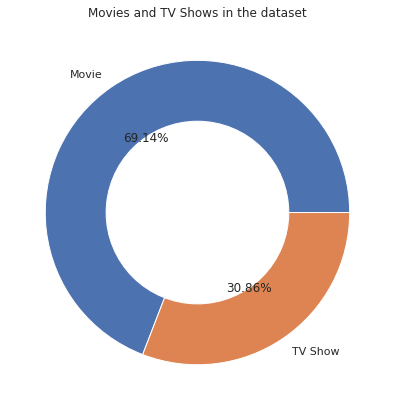

In [40]:

plt.figure(figsize=(7,7))
netflix_df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
# for donut chart  
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')

i. A pie chart, sometimes called a circle chart, is a way of summarizing a set of nominal data or displaying the different values of a given variable



ii. In this pie plot there are more movies 69.14% than TV shows 30.86% in the dataset.

# **Chart-2**

## Top actors for movies

Text(0.5, 1.0, 'Actors who have appeared in highest number of movies')

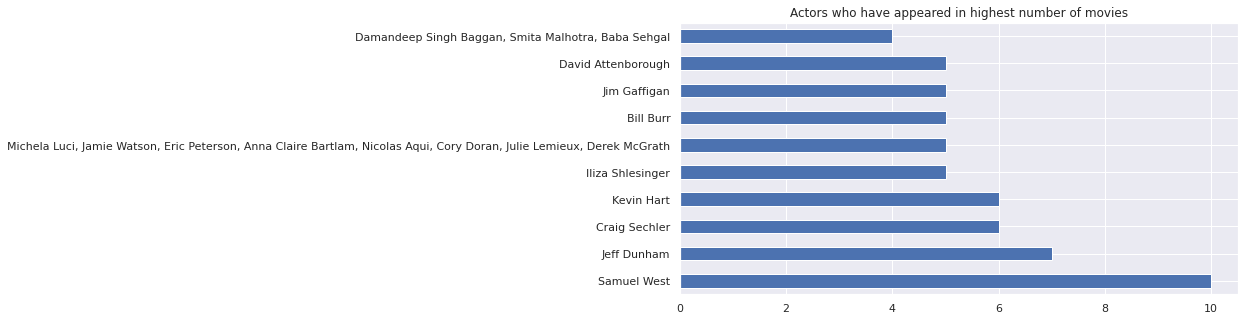

In [41]:

plt.figure(figsize=(10,5))
netflix_df[~(netflix_df['cast']=='Unknown') & (netflix_df['type']=='Movie')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of movies')

i. A horizontal bar plot is a plot that presents quantitative data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

ii. In this graph we found Top actors for movies. Top one actor in movies are Samuel West and second highest actor are jeff Dunham and third highest actor of movies are Craig Sechler and Kevin Hart.

# **Chart-3**

## Top actors for TV shows


Text(0.5, 1.0, 'Actors who have appeared in highest number of TV shows')

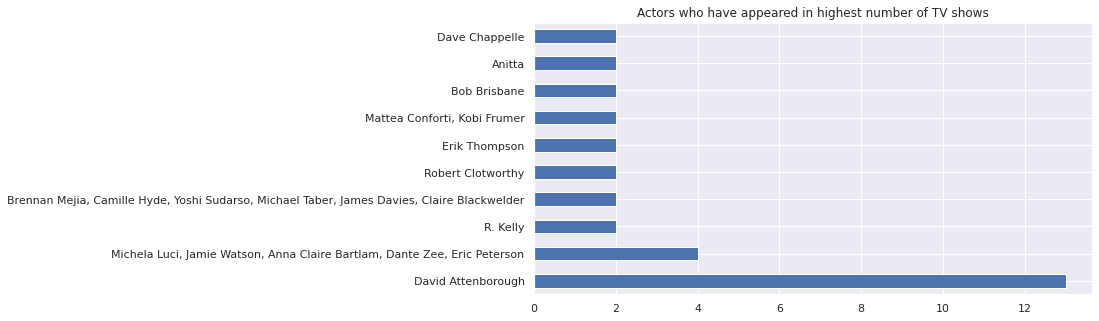

In [42]:
plt.figure(figsize=(10,5))
netflix_df[~(netflix_df['cast']=='Unknown') & (netflix_df['type']=='TV Show')].cast.value_counts().nlargest(10).plot(kind='barh')
plt.title('Actors who have appeared in highest number of TV shows')

i. A horizontal bar plot is a plot that presents quantitative data with rectangular bars with lengths proportional to the values that they represent. A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

ii. In this graph we found Actors who have appeared highest number of TV shows. Top one actor of TV Shows is David Attenborough and second highest actor in TV shows  many are there like Michela Luci,Jamie Watson,Anna Claire Bartlam,Dante Zee and Eric peterson.

# **Chart-4**

## Top 10 directors in the dataset


Text(0.5, 1.0, 'Top 10 directors by number of shows directed')

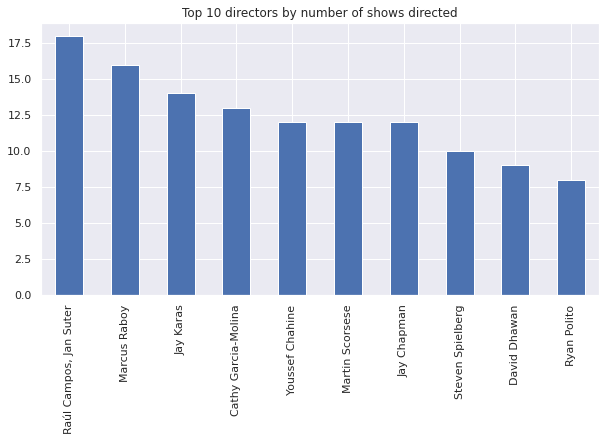

In [43]:
plt.figure(figsize=(10,5))
netflix_df[~(netflix_df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 directors by number of shows directed')

i. A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

**ii. In this Bar plot there are showing Top 10 directors by number of shows directed.**

1.Raul Campos jan Suter is 1st director from top 10.

2.Rayan Polito are top 10th director from top 10

# **Chart-5**

## Visualizing the year in which the movie / tv show was released


Text(0.5, 1.0, 'distribution by released year')

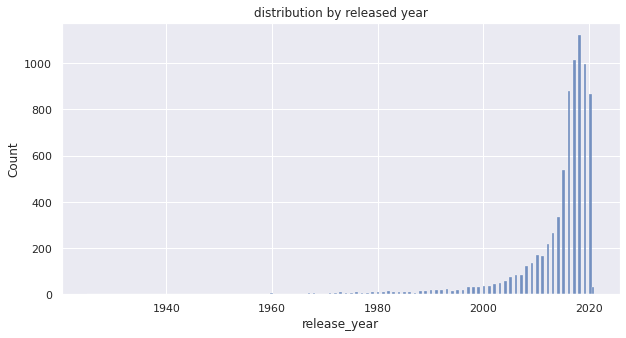

In [44]:
plt.figure(figsize=(10,5))
sns.histplot(netflix_df['release_year'])
plt.title('distribution by released year')

i. In statistics, a histogram is a graphical representation of the distribution of data. The histogram is represented by a set of rectangles, adjacent to each other, where each bar represent a kind of data.

ii. In this histogram we found release_year 2000 to 2020 more the the movie / tv show was released

# **Chart-6**

## Top 10 genre for movies


Text(0.5, 1.0, 'Top 10 genres for movies')

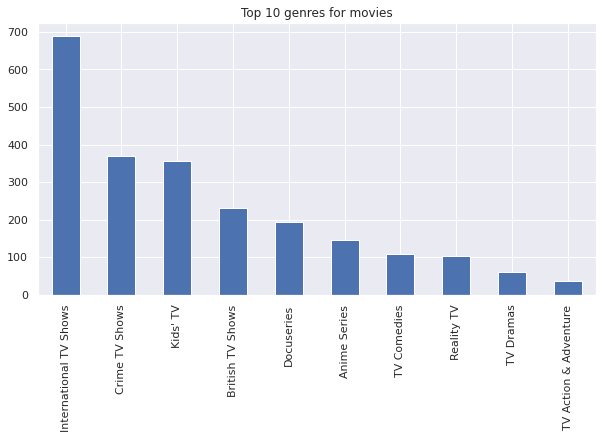

In [45]:
plt.figure(figsize=(10,5))
netflix_df[netflix_df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres for movies')

i. A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

ii. In this graph we found Top 10 genres for movies. International TV Shows are the highest number of genres type of TV shows and Crime TVShows and Kid's Shows are approximately same for generes type of TV shows.

# **Chart-7**

## Top 10 genre for movies


Text(0.5, 1.0, 'Top 10 genres for movies')

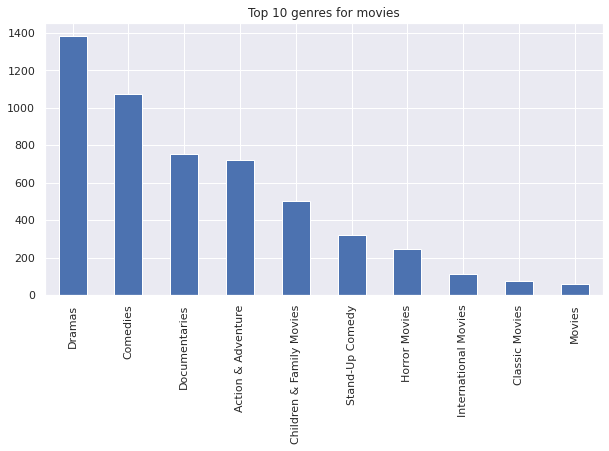

In [46]:
plt.figure(figsize=(10,5))
netflix_df[netflix_df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres for movies')

i. A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

ii. In this graph we found Top 10 genres for movies. Dramas are the highest number of genres type of movie followed by Comedies and Documentries.

# **Chart-8**

## Number of shows added on different months


Text(0.5, 0, '')

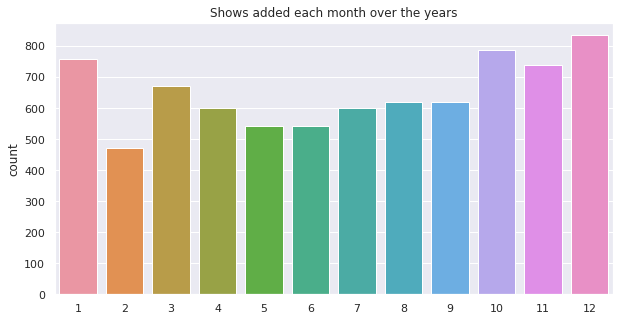

In [47]:
plt.figure(figsize = (10,5)) 
sns.countplot(netflix_df['month_added'])
plt.title('Shows added each month over the years')
plt.xlabel('')

i. in this count plot we found Number of shows added on different months.

ii. December are the highest number of shows added on December and Octobor are the second highest number of shows added on. we see most of the shows addend in period of october to january.

# **Chart-9**

## Number of shows added over the years


Text(0.5, 0, '')

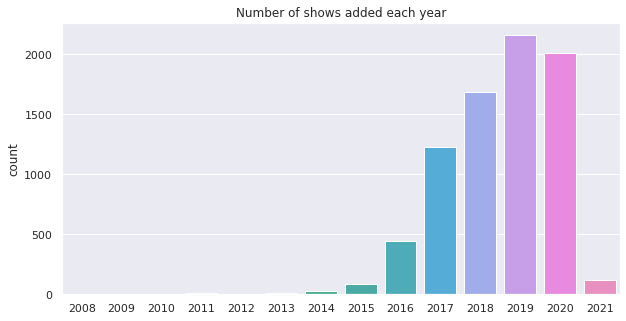

In [48]:
plt.figure(figsize = (10,5)) 
sns.countplot(netflix_df['year_added'])
plt.title('Number of shows added each year')
plt.xlabel('')

i. in this count plot we found Number of shows added on each different years.

ii. 2019 are the highest number of shows added on and 2020 are the second highest number of shows added on and 2018 are the third highest number of shows added on

# **Chart-10**

## Top 10 genres 


Text(0.5, 1.0, 'Top 10 genres')

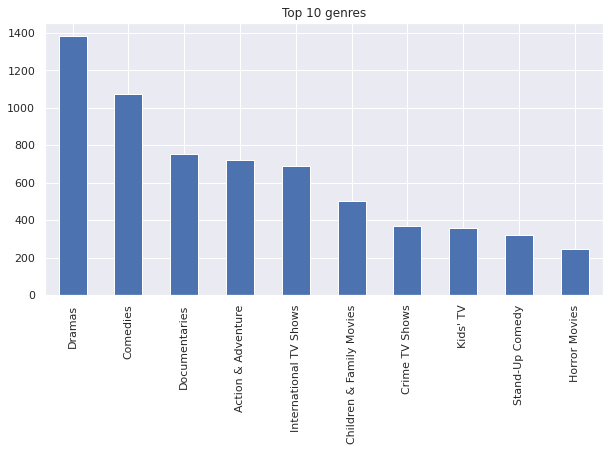

In [49]:
plt.figure(figsize=(10,5))
netflix_df.listed_in.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 genres')

i. A bar graph is a graphical representation of data in which we can highlight the category with particular shapes like a rectangle. The length and heights of the bar chart represent the data distributed in the dataset. In a bar chart, we have one axis representing a particular category of a column in the dataset and another axis representing the values or counts associated with it.  Bar charts can be plotted vertically or horizontally. A vertical bar chart is often called a column chart. 

ii. In this  bar plot we found Dramas are large value_counts of shows and movies and Comedies are the second large value_counts of shows and Movies.

# **Chart-11**

## Age ratings for shows in the dataset


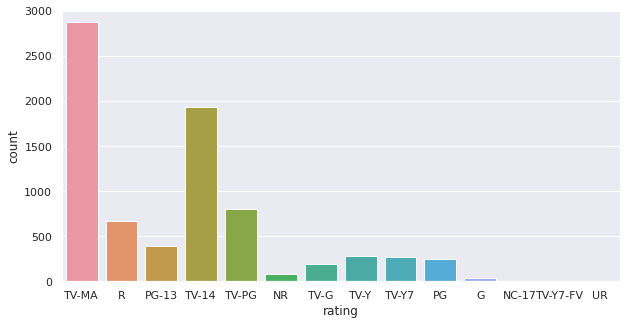

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=netflix_df)

i. countplot() method is used to Show the counts of observations in each categorical bin using bars.

ii. in this plot we found all rating count. TV-MA is the highest rating and second highest is TV-14 and third highest is TV-PG rating.

In [51]:
# Changing the values in the rating column
rating_map = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

netflix_df['rating'].replace(rating_map, inplace = True)
netflix_df['rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [52]:
netflix_df['principal_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['principal_country'].head()



0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: principal_country, dtype: object

In [53]:
country_order = netflix_df['principal_country'].value_counts()[:11].index
content_data = netflix_df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

In [54]:
netflix_df['count'] = 1
data = netflix_df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']



In [55]:
Flix_df_heatmap = netflix_df.loc[netflix_df['principal_country'].isin(data)]
Flix_df_heatmap = pd.crosstab(Flix_df_heatmap['principal_country'], Flix_df_heatmap['rating'],normalize = "index").T
Flix_df_heatmap

principal_country,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States,Unknown
rating,,,,,,,,,,
Adults,0.467181,0.627551,0.259414,0.368644,0.764228,0.463918,0.797619,0.526042,0.489051,0.320158
Kids,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.078125,0.074731,0.169960
Older Kids,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.184028,0.196038,0.235178
Teens,0.027027,0.030612,0.004184,0.012712,0.016260,0.000000,0.017857,0.071181,0.098366,0.005929
Young Adults,0.135135,0.142857,0.557531,0.334746,0.113821,0.365979,0.095238,0.140625,0.141814,0.268775


# **Chart-12**

 **Correlation Heatmap**

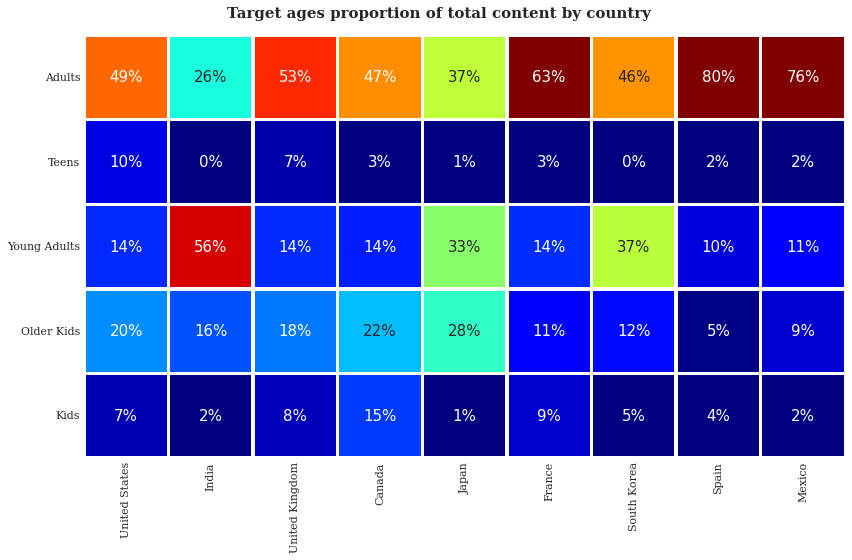

In [56]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(Flix_df_heatmap.loc[age_order,country_order2],cmap="jet",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

i. A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

ii. Thus to know the correlation between all the variables along with the correlation coefficients, i used correlation heatmap.

iii. In this correlation Heatmap graph we found the Target ages proportion of total content by country.

# **Chart-13**

## Age ratings for shows in the dataset


Text(0.5, 1.0, 'Number of shows on Netflix for different age groups')

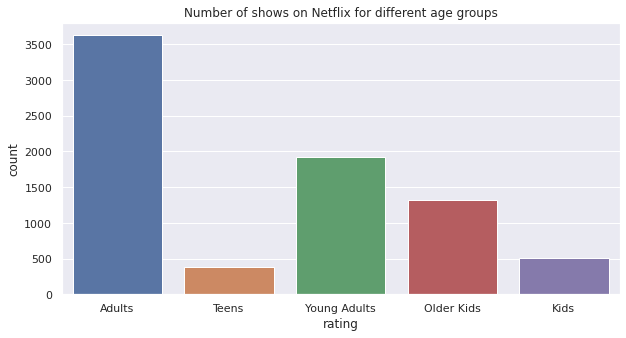

In [57]:
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=netflix_df)
plt.title('Number of shows on Netflix for different age groups')

i. i. countplot() method is used to Show the counts of observations in each categorical bin using bars.

ii. In this count plot we found that Number of shows on Netflix for different age groups and Adults are the highest number of shows and second highest is Young Adults and third highest is older Kids shows.

# **Chart-14**

## Number of movies and TV shows added over the years


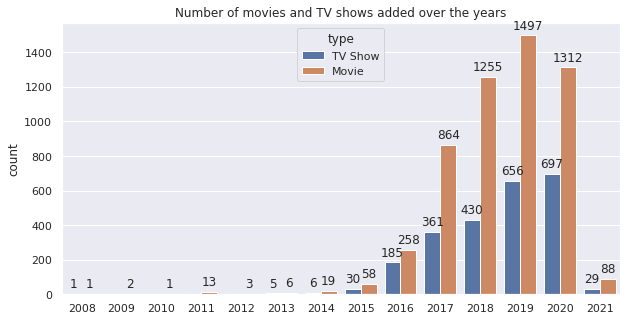

In [58]:
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=netflix_df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

i. A bivariate plot graphs the relationship between two variables that have been measured on a single sample of subjects. Such a plot permits you to see at a glance the degree and pattern of relation between the two variables.

ii. In this graph we found that Number of movies and TV shows added over the years.2019 are the 1497 movies and 656 TV shows are there. 2020 year 1312 movies and 697 TV shows are there and 2018 year 1255 movies and 430 TV shows are there.

# **Chart-15**

## Building a wordcloud for the movie descriptions


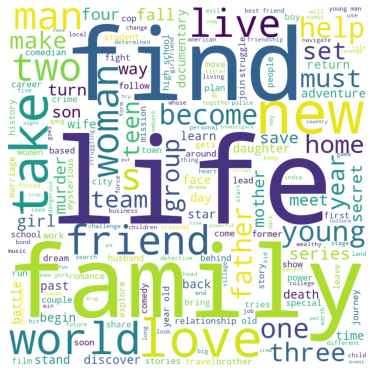

In [59]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in netflix_df.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

i. Word clouds or tag clouds are graphical representations of word frequency that give greater prominence to words that appear more frequently in a source text. The larger the word in the visual the more common the word was in the document(s).

ii. In this graph we found life,family,love,friend,world,new,find words are many time uses.

# **We have successfully completed your EDA Capstone Project !!!**

# **Data Processing**

In [60]:
# Using the model_df dataset for clustering since
# it does not require handling missing values
df = model_df.copy()

In [61]:
df.fillna('',inplace=True)

In [62]:
# Combining all the clustering attributes into a single column

df['clustering'] = (df['director'] + ' ' + 
                                df['cast'] +' ' + 
                                df['country'] +' ' + 
                                df['listed_in'] +' ' + 
                                df['description'])

In [63]:
# Select the 100 number of clusters for the dataset 
df['clustering'][100]

"Rajkumar Hirani Aamir Khan, Kareena Kapoor, Madhavan, Sharman Joshi, Omi Vaidya, Boman Irani, Mona Singh, Javed Jaffrey India Comedies, Dramas, International Movies While attending one of India's premier colleges, three miserable engineering students and best friends struggle to beat the school's draconian system."

# **Removing Punctuation**

In [64]:
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [65]:
# Removing punctuation marks
df['clustering'] = df['clustering'].apply(remove_punctuation)

In [66]:
# Select the 100 number of clusters for the dataset 
df['clustering'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies Dramas International Movies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

# **Removing non-ASCII characters:**

In [67]:
# function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [68]:
# remove non-ascii characters
df['clustering'] = remove_non_ascii(df['clustering'])

In [69]:
# Select the 100 number of clusters for the dataset 
df['clustering'][100]

'Rajkumar Hirani Aamir Khan Kareena Kapoor Madhavan Sharman Joshi Omi Vaidya Boman Irani Mona Singh Javed Jaffrey India Comedies Dramas International Movies While attending one of Indias premier colleges three miserable engineering students and best friends struggle to beat the schools draconian system'

# **Removing stopwords**

In [70]:
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sentences = stopwords.words('english')
# displaying the stopwords
np.array(sentences)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [71]:
# function to remove stop words
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sentences]
    # joining the list of words with space separator
    return " ".join(text)

In [72]:
# Removing stop words
df['clustering'] = df['clustering'].apply(remove_stopwords)

In [73]:
# Select the 100 number of clusters for the dataset 
df['clustering'][100]

'rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies dramas international movies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system'

# **Removing  Lemmatization:**

In [74]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [75]:
# Lemmatization
df['clustering'] = lemmatize_verbs(df['clustering'])

In [76]:
# Select the 100 number of clusters for the dataset 
print(df['clustering'][100])

rajkumar hirani aamir khan kareena kapoor madhavan sharman joshi omi vaidya boman irani mona singh javed jaffrey india comedies dramas international movies attending one indias premier colleges three miserable engineering students best friends struggle beat schools draconian system


# **Tokenization:**

In [77]:
# Create a reference variable for Class TweetTokenizer
tokenizer = TweetTokenizer()

In [78]:
# Create text column based on dataset
df['clustering'] = df['clustering'].apply(lambda x: tokenizer.tokenize(x))

In [79]:
# Select the 100 number of Tokenization for the dataset 
print(df['clustering'][100])

['rajkumar', 'hirani', 'aamir', 'khan', 'kareena', 'kapoor', 'madhavan', 'sharman', 'joshi', 'omi', 'vaidya', 'boman', 'irani', 'mona', 'singh', 'javed', 'jaffrey', 'india', 'comedies', 'dramas', 'international', 'movies', 'attending', 'one', 'indias', 'premier', 'colleges', 'three', 'miserable', 'engineering', 'students', 'best', 'friends', 'struggle', 'beat', 'schools', 'draconian', 'system']


# **Vectorization:**

In [80]:
# clustering tokens saved in a variable
clustering_vectorization = df['clustering']

In [81]:
# Tokenization
def tokenizer(text):
  return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
x = tfidf.fit_transform(clustering_vectorization)

In [82]:
# Dataset Rows & Columns count
x.shape

(7787, 20000)

In [83]:
# convert X into array form for clustering
X = x.toarray()

In [84]:
# Check the matrix
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#**Reduceing Diemensionality using PCA**

In [85]:
# using PCA to reduce dimensionality
pca = PCA(random_state=40)
pca.fit(X)

PCA(random_state=40)

Text(0, 0.5, 'cumulative explained variance')

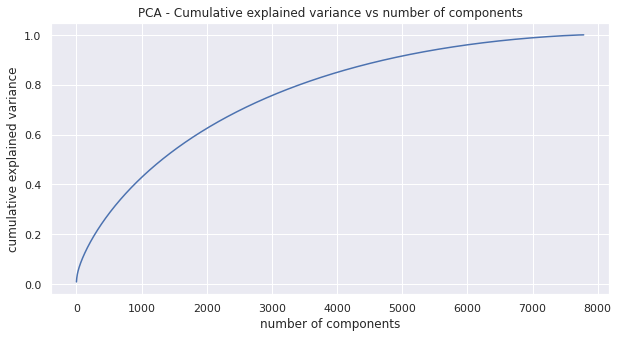

In [86]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [87]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=4000,random_state=40)
pca.fit(X)

PCA(n_components=4000, random_state=40)

In [88]:
# transformed features
x_pca = pca.transform(X)

In [89]:
# shape of transformed vectors
x_pca.shape

(7787, 4000)

# **Now start wih Unservised Machine Learning clustering algorithms**

##**1.K-Means Clustering:**

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
# Plotting Silhouette score for different number of clusters
range_n_clusters = range(2,31)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  cluster_labels = kmeans.labels_
 
  # silhouette score
  silhouette_avg.append(silhouette_score(x_pca, cluster_labels))

plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [ ]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=40)
kmeans.fit(x_pca)

In [ ]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(x_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##**2.Hierarchical clustering:**

In [ ]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(16, 7))  
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(x_pca)

In [ ]:
# Adding a kmeans cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# **Using Content based recommender system**

In [ ]:
# Changing the index of the df from show id to show title
df['show_id'] = df.index

In [ ]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

df['clustering'] = df['clustering'].apply(lambda x: convert(x))

In [ ]:
# setting title of movies/Tv shows as index
df.set_index('title',inplace=True)

In [ ]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(df['clustering'])

In [ ]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [ ]:
# Dataset Rows & Columns count
cosine_similarity.shape

In [ ]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(df.index)

def recommendation_df(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [ ]:
# Recommendations for 'A Man Called God'
recommendation_df("Class of '83")   # Ludo

In [ ]:
# Recommendations for 'Phir Hera Pheri'
recommendation_df('Phir Hera Pheri')

In [ ]:
# Recommendations for 'Ludo '
recommendation_df('Ludo')

In [ ]:
# Recommendations for 'Stranger Things'
recommendation_df('Stranger Things')

#**Conclusion**

- **In this project, we worked on a text clustering problem wherein we had to cluster the Netflix shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.**
- **The dataset contained about 7787 records, and 11 attributes.We began by dealing with the dataset's missing values and doing exploratory data analysis (EDA).**
- **It was found that Netflix hosts more movies than TV shows on its platform, and the total number of shows added on Netflix is growing exponentially. Also, majority of the shows were produced in the United States.**
- **I decided to cluster the data based on the attributes like director, cast, country, genre, rating and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.**
- **Through TFIDF Vectorization, we created a total of 10000 attributes**.
- **We used Principal Component Analysis (PCA) to reduce dimensionality.4000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 4000.**
- **We first built clusters using the K-Means Clustering algorithm, and the optimal number of clusters came out to be 6. This was obtained through the elbow method and Silhouette score analysis.**
- **Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 7. This was obtained after visualizing the dendrogram**.
- **A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make top 10 recommendations to the user based on the type of show they watched.**

# **We Sucessfully Completed Machine Learning Unsupervised Algorithm Capstone Project !!!**